# Imports

In [36]:
# scikit-learn pereptron and adaline implementations
from sklearn.linear_model import Perceptron as SklearnPerceptron
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Additional packages
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # <- add if needed

# Part 1: Preporcessing

#Project Adult Cleaning

In [37]:
# Load the provided dataset
adult_df = pd.read_csv("/project_adult.csv")

# Quick look at the data
print(adult_df.shape)
adult_df.head()

(26048, 16)


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,>50K
1,19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1887,50,United-States,>50K
2,10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,46,United-States,<=50K
4,9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step a: Handle Missing Values

In [39]:
# Replace "?" with NaN for consistency
adult_df = adult_df.replace("?", pd.NA)

# Drop rows with missing values (common approach for Adult dataset)
# adult_df = adult_df.dropna()

print("After handling missing values:", adult_df.shape)

After handling missing values: (26048, 16)


In [40]:
for col in ['workclass', 'native-country']:
    mode_train = adult_df[col].mode()[0]
    adult_df[col] = adult_df[col].fillna(mode_train)

print("After imputing missing values with mode:")
print("Training data shape:", adult_df.shape)

# Verify if there are any remaining missing values in these columns
print("\nMissing values after imputation (training):")
print(adult_df[['workclass', 'native-country']].isnull().sum())

After imputing missing values with mode:
Training data shape: (26048, 16)

Missing values after imputation (training):
workclass         0
native-country    0
dtype: int64


# Step b: Encode categorical values

In [41]:
# Separate features and target
X = adult_df.drop("income", axis=1)   # predictors
y = adult_df["income"]                # response

# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, drop_first=True)

print("Encoded feature shape:", X_encoded.shape)


Encoded feature shape: (26048, 98)


# Split into train and test

In [42]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (18233, 98)
Test set size: (7815, 98)


# Step c: Standardize numerical values

In [43]:
scaler = StandardScaler()

# Fit on training set, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization complete.")

Standardization complete.


In [44]:
adult_df = adult_df.drop(columns=["Unnamed: 0"])

# Project Validation Inputs Cleaning

In [45]:
# Load the validation inputs dataset
val_df = pd.read_csv("/project_validation_inputs.csv")

# Drop the unnamed ID column
val_df = val_df.drop(columns=["Unnamed: 0"])

print(val_df.shape)
val_df.head()

(6513, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
1,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
2,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States
3,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States
4,29,Self-emp-not-inc,189346,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,2202,0,50,United-States


# Step a: Handle Missing Values

In [46]:
# Replace "?" with NaN
val_df = val_df.replace("?", pd.NA)

# Drop rows with missing values (same as training data handling)
# val_df = val_df.dropna()

print("After dropping missing values:", val_df.shape)

After dropping missing values: (6513, 14)


# Step b: Encode Categorical values

In [47]:
# One-hot encode the validation features
val_encoded = pd.get_dummies(val_df, drop_first=True)

print("Encoded validation shape:", val_encoded.shape)


Encoded validation shape: (6513, 94)


In [48]:
# Align encoded validation data with training columns
# This ensures both have the same one-hot encoded feature set
val_encoded = val_encoded.reindex(columns=X_encoded.columns, fill_value=0)

print("Aligned validation shape:", val_encoded.shape)

Aligned validation shape: (6513, 98)


# Step c: Standardize numerical values

In [49]:
# Apply the same scaler fit on training data
val_scaled = scaler.transform(val_encoded)

print("Validation data preprocessing complete. Ready for predictions later.")

Validation data preprocessing complete. Ready for predictions later.


In [50]:
print(" Preprocessing Summary ")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled  shape: {X_test_scaled.shape}")
print(f"Validation (val_scaled) shape: {val_scaled.shape}")

print("\nTarget variable sizes:")
print(f"y_train shape: {y_train.shape}")
print(f"y_test  shape: {y_test.shape}")

# Double-check column consistency between training/test/validation
train_cols = X_encoded.columns
val_cols   = val_encoded.columns

print("\nColumn alignment check:")
print("Validation columns match training?", set(train_cols) == set(val_cols))

 Preprocessing Summary 
X_train_scaled shape: (18233, 98)
X_test_scaled  shape: (7815, 98)
Validation (val_scaled) shape: (6513, 98)

Target variable sizes:
y_train shape: (18233,)
y_test  shape: (7815,)

Column alignment check:
Validation columns match training? True


## Define and Tune MLP Models



In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define a reduced parameter grid for MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50)],  # Reduced options
    'activation': ['relu'],                    # Focused on 'relu' as it's common
    'solver': ['adam'],                        # Focused on 'adam'
    'alpha': [0.0001, 0.01],                 # Reduced options
    'learning_rate_init': [0.001]
}

# Instantiate MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000) # Increased max_iter for convergence

# Initialize GridSearchCV with the reduced param_grid
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV with the reduced parameters
grid_search.fit(X_train_scaled, y_train)

print("GridSearchCV fitting complete with reduced parameter grid.")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV fitting complete with reduced parameter grid.


MLP Best Model Evaluation on Test Set
Accuracy: 0.8212412028150992

Classification Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      5934
        >50K       0.65      0.56      0.60      1881

    accuracy                           0.82      7815
   macro avg       0.76      0.73      0.74      7815
weighted avg       0.81      0.82      0.82      7815



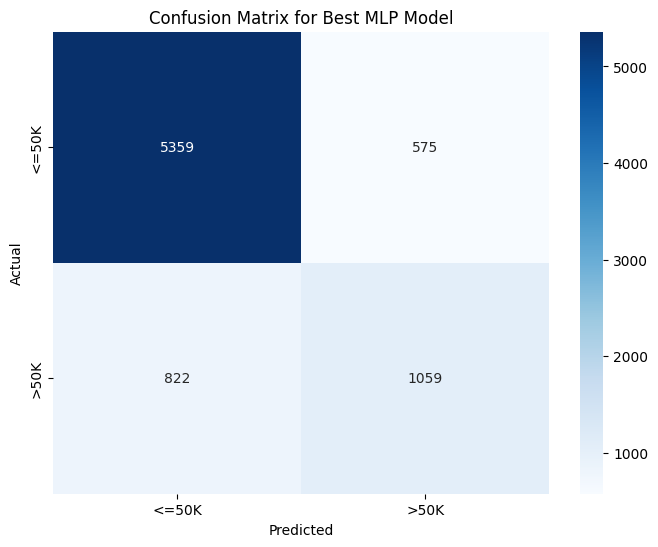

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_mlp_model.predict(X_test_scaled)

# Evaluate the model
print("MLP Best Model Evaluation on Test Set")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_mlp_model.classes_, yticklabels=best_mlp_model.classes_)
plt.title('Confusion Matrix for Best MLP Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Predict Response Variable for Validation Inputs



In [53]:
# Predict on the validation set using the best model
val_predictions = best_mlp_model.predict(val_scaled)

print("Sample of predictions on validation set:")
print(val_predictions[:10]) # Display the first 10 predictions


Sample of predictions on validation set:
['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K' '>50K' '<=50K' '<=50K'
 '<=50K']


In [54]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}


In [56]:
output_filename = 'Group_13_MLP_PredictedOutputs.csv'
pd.DataFrame(val_predictions).to_csv(output_filename, header=False, index=False)

print(f"Predictions saved to {output_filename}")
print(f"File exists: {Path(output_filename).exists()}")

Predictions saved to Group_13_MLP_PredictedOutputs.csv
File exists: True
